### Load and Clean Dataset (Remove first column and move target to the end)

In [1]:
import pandas as pd

df = pd.read_csv("diamonds.csv")

# Drop the first unnamed column
df.drop(columns=["Unnamed: 0"], inplace=True)

# Move 'price' column to the end
price = df['price']
df.drop(columns=['price'], inplace=True)
df['price'] = price

# Show the cleaned dataset
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


### Dataset Overview and Basic Information

In [2]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
df.describe(include='all')

Dataset Shape: (53940, 10)

Column Names: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z', 'price']

Data Types:
 carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

Missing Values:
 carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


,carat,cut,color,clarity,depth,table,x,y,z,price
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,5.731157,5.734526,3.538734,3932.799722
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,1.121761,1.142135,0.705699,3989.439738
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.720000,2.910000,950.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.700000,5.710000,3.530000,2401.000000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,6.540000,6.540000,4.040000,5324.250000


### Remove rows with 0 in x, y, z

In [3]:
 df = df[(df['x'] > 0) & (df['y'] > 0) & (df['z'] > 0)]

# Confirm the new shape
print("Shape after cleaning:", df.shape)

Shape after cleaning: (53920, 10)


### Heatmap of Correlation Between Numerical Features

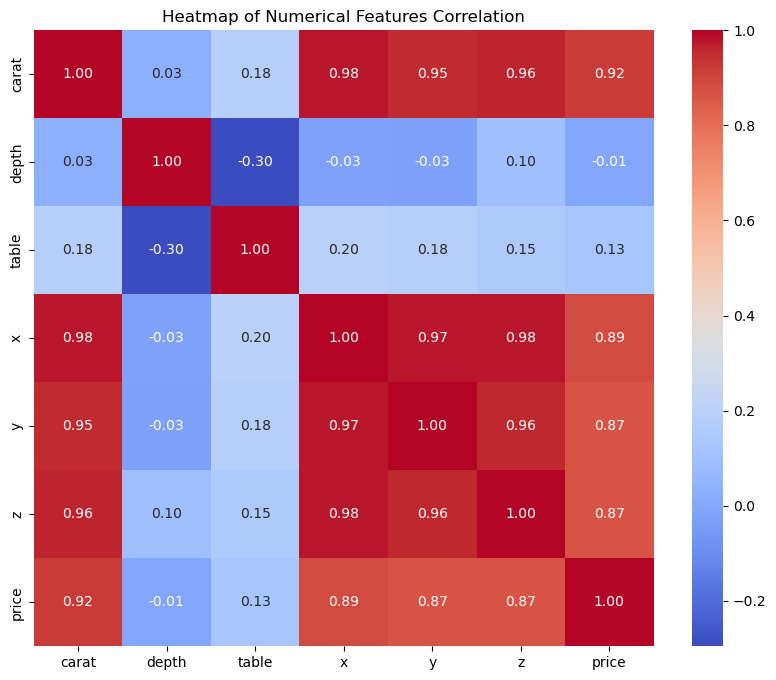

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
corr_matrix = numerical_df.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Numerical Features Correlation')
plt.show()

### Regression plots for numerical features vs price

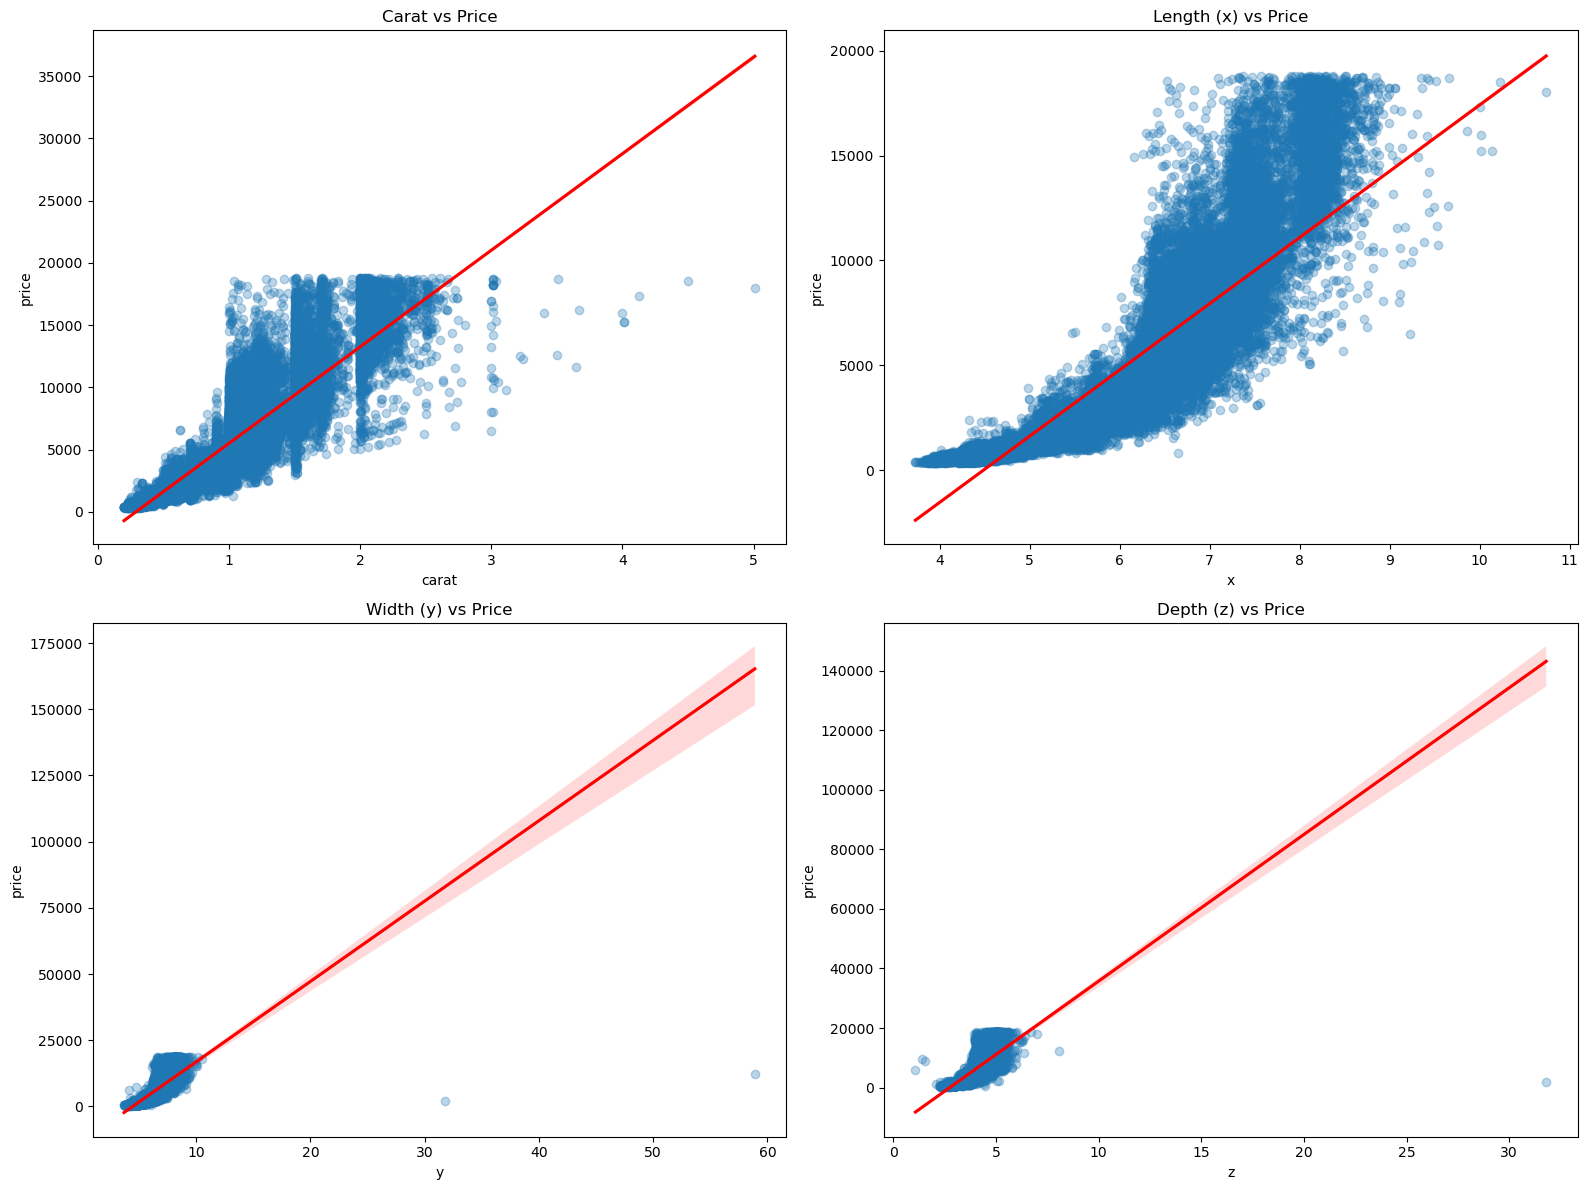

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))

# Carat vs Price
plt.subplot(2, 2, 1)
sns.regplot(x='carat', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Carat vs Price')

# x vs Price
plt.subplot(2, 2, 2)
sns.regplot(x='x', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Length (x) vs Price')

# y vs Price
plt.subplot(2, 2, 3)
sns.regplot(x='y', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Width (y) vs Price')

# z vs Price
plt.subplot(2, 2, 4)
sns.regplot(x='z', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title('Depth (z) vs Price')

plt.tight_layout()
plt.show()

### Box Plots: Relationship between categorical features and price

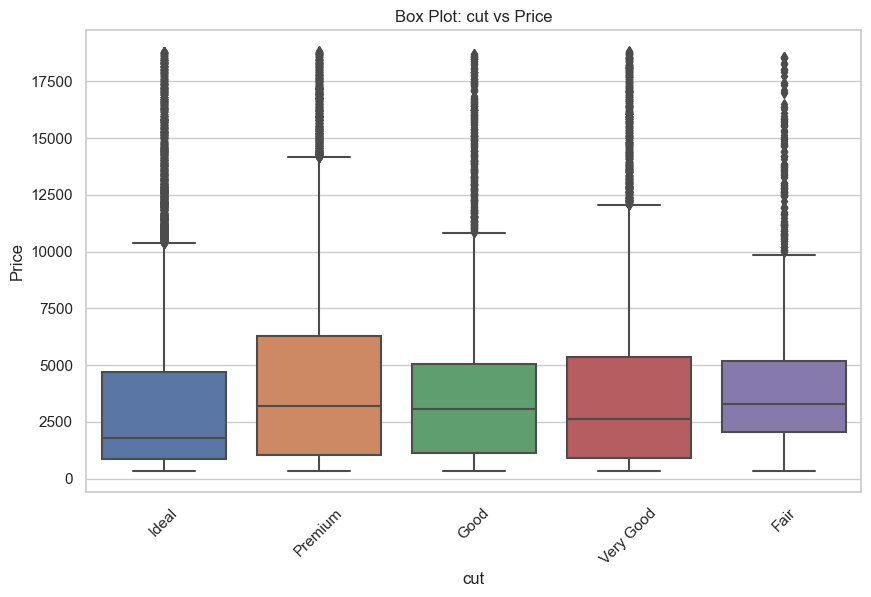

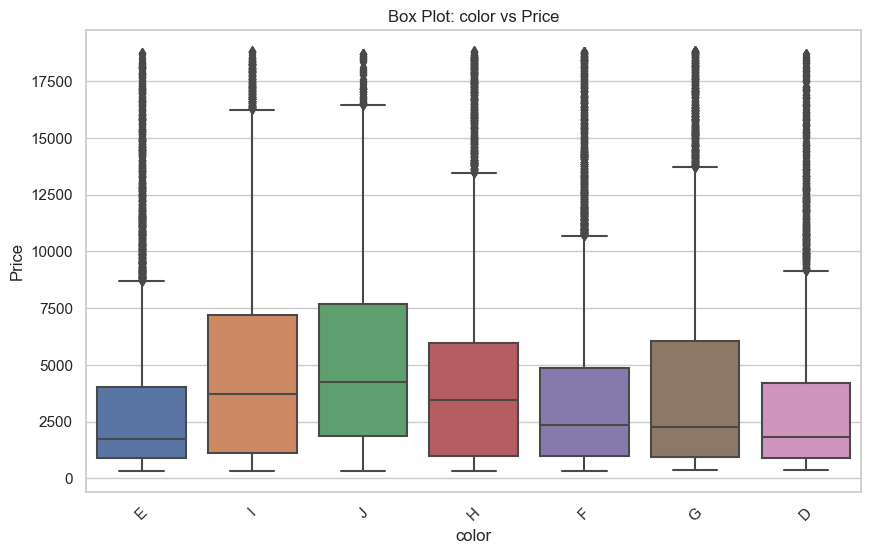

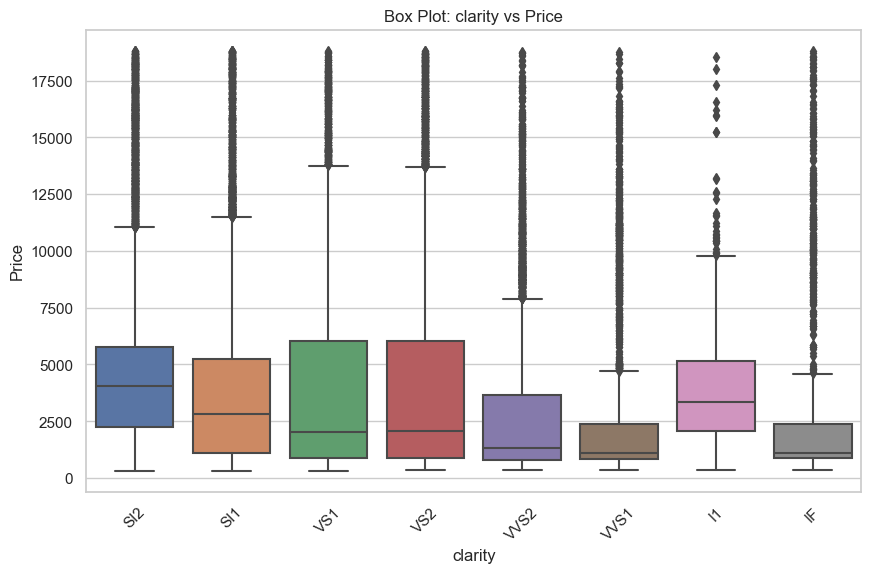

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Set style
sns.set(style="whitegrid")

# Categorical features to analyze
categorical_features = ['cut', 'color', 'clarity']

# Plot boxplots
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=feature, y='price', data=df)
    plt.title(f'Box Plot: {feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

## Preprocessing

### Step 1: Label Encoding of Categorical Features

In [9]:
from sklearn.preprocessing import LabelEncoder

df_preprocessed = df.copy()
label_enc = LabelEncoder()

for col in ['cut', 'color', 'clarity']:
    df_preprocessed[col] = label_enc.fit_transform(df_preprocessed[col])

# Display first 10 rows after encoding
df_preprocessed[['cut', 'color', 'clarity']].head(10)

,cut,color,clarity
0,2,1,3
1,3,1,2
2,1,1,4
3,3,5,5
4,1,6,3
5,4,6,7
6,4,5,6
7,4,4,2
8,0,1,5
9,4,4,4


### Step 2: Drop irrelevant features

In [10]:
df_preprocessed.drop(columns=['depth', 'table'], inplace=True)

### Step 3: Remove Outliers from 'y' and 'z'

In [11]:
# Using IQR method to filter out extreme outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df_preprocessed = remove_outliers(df_preprocessed, 'y')
df_preprocessed = remove_outliers(df_preprocessed, 'z')

print("✅ Outliers removed. Shape after cleaning:", df_preprocessed.shape)

✅ Outliers removed. Shape after cleaning: (53881, 8)


### Step 4: Normalize the Data (Min-Max Scaling)

In [12]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df_preprocessed.drop(columns=['price'])
y = df_preprocessed[['price']]

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Print shape of final feature and label sets
print("✅ Features (X) shape:", X_scaled.shape)
print("✅ Target (y) shape:", y.shape)

# Display first 10 rows after normalization (features only)
X_scaled.head(10)

✅ Features (X) shape: (53881, 7)
✅ Target (y) shape: (53881, 1)


,carat,cut,color,clarity,x,y,z
0,0.010526,0.50,0.166667,0.428571,0.038664,0.053763,0.238318
1,0.003509,0.75,0.166667,0.285714,0.028120,0.028674,0.210280
2,0.010526,0.25,0.166667,0.571429,0.056239,0.069892,0.210280
3,0.031579,0.75,0.833333,0.714286,0.082601,0.098566,0.285047
4,0.038596,0.25,1.000000,0.428571,0.107206,0.120072,0.313084
5,0.014035,1.00,1.000000,1.000000,0.036907,0.050179,0.250000
6,0.014035,1.00,0.833333,0.857143,0.038664,0.053763,0.247664
7,0.021053,1.00,0.666667,0.285714,0.059754,0.077061,0.261682
8,0.007018,0.00,0.166667,0.714286,0.024605,0.017921,0.252336
9,0.010526,1.00,0.666667,0.571429,0.047452,0.066308,0.228972


### Splitting Dataset into Train and Test Sets

In [13]:
from sklearn.model_selection import train_test_split

# Use the normalized features (X_scaled) and original price (y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Check the shape of the splits
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape :", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape :", y_test.shape)

✅ X_train shape: (37716, 7)
✅ X_test shape : (16165, 7)
✅ y_train shape: (37716, 1)
✅ y_test shape : (16165, 1)


## Fit Model

### Multiple Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

# Predict prices using test set
y_pred_mlr = mlr_model.predict(X_test)

### Random Forest Regressor

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())

# Predict prices using test set
y_pred_rf = rf_model.predict(X_test)

### Import evaluation metrics

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Evaluate Linear Regression

In [17]:
mae_mlr = mean_absolute_error(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)

print("Multiple Linear Regression Evaluation:")
print(f"   MAE : {mae_mlr:.2f}")
print(f"   MSE : {mse_mlr:.2f}")

Multiple Linear Regression Evaluation:
   MAE : 844.87
   MSE : 1681356.55


### Evaluate Random Forest

In [18]:
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print("Random Forest Regressor Evaluation:")
print(f"   MAE : {mae_rf:.2f}")
print(f"   MSE : {mse_rf:.2f}")

Random Forest Regressor Evaluation:
   MAE : 271.10
   MSE : 303910.69


## Visualizing Errors

### Table for MAE and MSE Comparison

In [19]:
# Display MAE and MSE for both models
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mae_mlr, mae_rf],
    'MSE': [mse_mlr, mse_rf]
})

# Show results table
print("🔍 Model Evaluation Results:")
display(results)

🔍 Model Evaluation Results:


,Model,MAE,MSE
0,Linear Regression,844.870227,1.681357e+06
1,Random Forest,271.103473,3.039107e+05


### Bar Plot for MAE and MSE Comparison

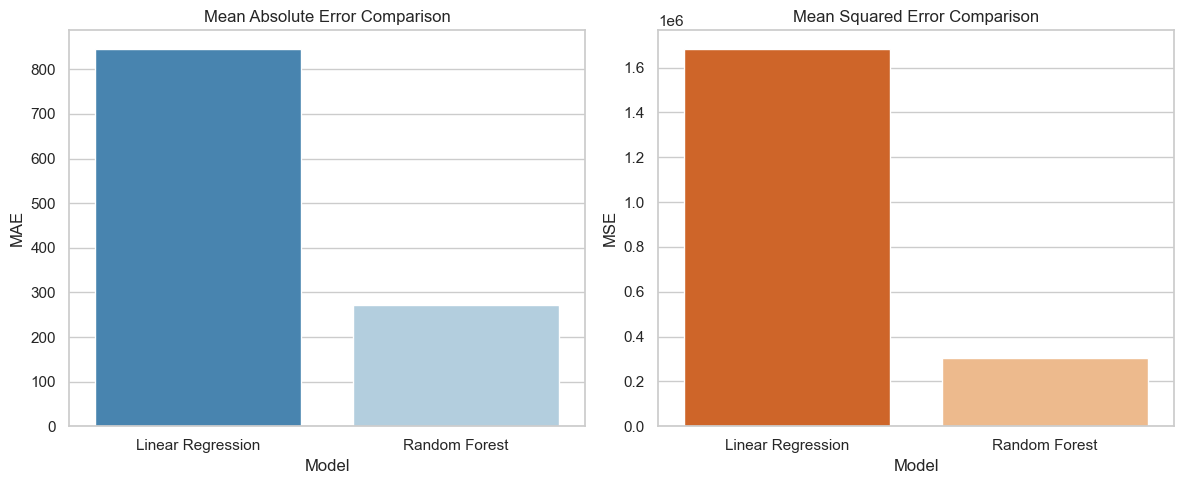

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# MAE Plot
sns.barplot(x='Model', y='MAE', data=results, ax=axes[0], palette='Blues_r')
axes[0].set_title('Mean Absolute Error Comparison')
axes[0].set_ylabel('MAE')

# MSE Plot
sns.barplot(x='Model', y='MSE', data=results, ax=axes[1], palette='Oranges_r')
axes[1].set_title('Mean Squared Error Comparison')
axes[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

## User Interface

In [21]:
# Example Input from User (manual values)
example_input = {
    'carat': 0.75,
    'cut': 'Premium',
    'color': 'E',
    'clarity': 'VS1',
    'x': 5.5,
    'y': 5.5,
    'z': 3.5
}

# Encode categorical values (must match original encoding order)
cut_map = {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
color_map = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
clarity_map = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Convert input using the maps
input_encoded = pd.DataFrame([{
    'carat': example_input['carat'],
    'cut': cut_map[example_input['cut']],
    'color': color_map[example_input['color']],
    'clarity': clarity_map[example_input['clarity']],
    'x': example_input['x'],
    'y': example_input['y'],
    'z': example_input['z']
}])

# Normalize input using the same scaler
input_scaled = scaler.transform(input_encoded)

# Wrap scaled input back in a DataFrame with proper column names
input_scaled_df = pd.DataFrame(input_scaled, columns=X_scaled.columns)

# Predict again with column names
predicted_price = rf_model.predict(input_scaled_df)[0]
print(f"💎 Predicted Diamond Price: ${predicted_price:.2f}")

💎 Predicted Diamond Price: $2597.86


## Deploy Model with Gradio

In [26]:
pip install gradio

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.2.2 requires pyqt5<5.13, which is not installed.
spyder 5.2.2 requires pyqtwebengine<5.13, which is not installed.
anaconda-project 0.11.1 requires ruamel-yaml, which is not installed.
jupyter-server 1.18.1 requires anyio<4,>=3.1.0, but you have anyio 4.9.0 which is incompatible.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.
conda-repo-cli 1.0.20 requires requests==2.28.1, but you have requests 2.32.3 which is incompatible.
botocore 1.27.28 requires urllib3<1.27,>=1.25.4, but you have urllib3 2.4.0 which is incompatible.


     ---------------------------------------- 18.1/18.1 MB 5.9 MB/s eta 0:00:00
     -------------------------------------- 128.7/128.7 kB 7.9 MB/s eta 0:00:00
     ---------------------------------------- 95.2/95.2 kB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 11.7/11.7 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 45.3/45.3 kB ? eta 0:00:00
     ---------------------------------------- 73.5/73.5 kB 4.2 MB/s eta 0:00:00
     -------------------------------------- 443.9/443.9 kB 4.7 MB/s eta 0:00:00
     -------------------------------------- 318.7/318.7 kB 6.6 MB/s eta 0:00:00
     -------------------------------------- 489.3/489.3 kB 7.7 MB/s eta 0:00:00
     ---------------------------------------- 62.5/62.5 kB 3.5 MB/s eta 0:00:00
     -------------------------------------- 134.5/134.5 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 125.0/125.0 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 7

In [22]:
import gradio as gr
import pandas as pd

# Define encoding maps again
cut_map = {'Fair': 0, 'Good': 1, 'Ideal': 2, 'Premium': 3, 'Very Good': 4}
color_map = {'D': 0, 'E': 1, 'F': 2, 'G': 3, 'H': 4, 'I': 5, 'J': 6}
clarity_map = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}

# Define prediction function
def predict_price(carat, cut, color, clarity, x, y, z):
    # Encode categorical features
    input_dict = {
        'carat': carat,
        'cut': cut_map[cut],
        'color': color_map[color],
        'clarity': clarity_map[clarity],
        'x': x,
        'y': y,
        'z': z
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_dict])

    # Normalize input using the trained scaler
    input_scaled = scaler.transform(input_df)
    input_scaled_df = pd.DataFrame(input_scaled, columns=X_scaled.columns)

    # Predict using Random Forest
    prediction = rf_model.predict(input_scaled_df)[0]
    return f"${prediction:.2f}"

# Set up Gradio UI
iface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(0.2, 5.0, value=0.75, label="Carat"),
        gr.Radio(list(cut_map.keys()), label="Cut"),
        gr.Radio(list(color_map.keys()), label="Color"),
        gr.Radio(list(clarity_map.keys()), label="Clarity"),
        gr.Number(value=5.5, label="Length (x in mm)"),
        gr.Number(value=5.5, label="Width (y in mm)"),
        gr.Number(value=3.5, label="Depth (z in mm)")
    ],
    outputs=gr.Textbox(label="💎 Predicted Diamond Price"),
    title="Diamond Price Prediction",
    description="Enter the diamond's features and get an estimated price."
)

iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
